# Analiza danych hydrologicznych - stacja Kraków-Czernichów, 2016-2018

## Zaimportowane moduły i pliki

In [1]:
import time
import zipfile
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_dir = 'dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_hydrologiczne/dobowe'
zip_files = glob(f'{data_dir}/*/*.zip')

## Ekstrakcja z archiwów .zip
Ten skrypt ma za zadanie wypakowanie zawartości pliku .zip (plik .csv) do tej samej ścieżki, a następnie stworzenie listy otrzymanych plików .csv.

In [3]:
def unpack(files: list) -> list:
    for file in files:
        with zipfile.ZipFile(file) as zip_file:
            zip_file.extractall(file[:77])

    #csv files - new list
    csv_files = glob(f'{data_dir}/*/*.csv')

    return sorted(csv_files)



## Analiza danych

In [4]:
start_time = time.time()
codz_names = (
    'Kod stacji',
    'Nazwa stacji',
    'Nazwa rzeki/jeziora',
    'Rok hydrologiczny',
    'Wskaźnik miesiąca w roku hydrologicznym',
    'Dzień',
    'Stan wody [cm]',
    'Przepływ [m^3/s]',
    'Temperatura wody [st. C]',
    'Miesiąc kalendarzowy'
)

zjaw_names = (
    'Kod stacji',
    'Nazwa stacji',
    'Nazwa rzeki/jeziora',
    'Rok hydrologiczny',
    'Wskaźnik miesiąca w roku hydrologicznym',
    'Dzień',
    'Grubość lodu [cm]',
    'Kod zjawiska lodowego',
    'Procent udziału zjawiska lodowego / 10',
    'Kod zarastania'
)
KRK_BIELANY = pd.DataFrame()
dates = []
stations = []
for file in unpack(zip_files):
    if 'codz_' in file:
        df = pd.read_csv(
            file,
            encoding='windows-1250',
            names=codz_names
        )
        for row in df['Nazwa stacji']:
            if row not in stations:
                stations.append(row)

DATA = {}
for station in stations:
    DATA[station] = df[df['Nazwa stacji'] == station]
print(DATA)

krk_bielany = df[df['Nazwa stacji'] == 'KRAKÓW-BIELANY']

KRK_BIELANY = pd.concat([KRK_BIELANY, krk_bielany], ignore_index=True)

for idx, row in enumerate(KRK_BIELANY['Rok hydrologiczny']):
    date = f"{row}.{KRK_BIELANY['Wskaźnik miesiąca w roku hydrologicznym'][idx]:02d}.{KRK_BIELANY['Dzień'][idx]:02d}"
    dates.append(date)
KRK_BIELANY.insert(value=dates, column='Data', loc=3)

KRK_BIELANY = KRK_BIELANY.drop(
    axis=1,
    labels=[
        'Rok hydrologiczny',
        'Wskaźnik miesiąca w roku hydrologicznym',
        'Dzień',
        'Miesiąc kalendarzowy'
    ]
)

print(f'execution time: {time.time() - start_time} s')
KRK_BIELANY.head()

{'CHAŁUPKI':     Kod stacji Nazwa stacji Nazwa rzeki/jeziora  Rok hydrologiczny  \
0    149180020     CHAŁUPKI            Odra (1)               2018   
1    149180020     CHAŁUPKI            Odra (1)               2018   
2    149180020     CHAŁUPKI            Odra (1)               2018   
3    149180020     CHAŁUPKI            Odra (1)               2018   
4    149180020     CHAŁUPKI            Odra (1)               2018   
5    149180020     CHAŁUPKI            Odra (1)               2018   
6    149180020     CHAŁUPKI            Odra (1)               2018   
7    149180020     CHAŁUPKI            Odra (1)               2018   
8    149180020     CHAŁUPKI            Odra (1)               2018   
9    149180020     CHAŁUPKI            Odra (1)               2018   
10   149180020     CHAŁUPKI            Odra (1)               2018   
11   149180020     CHAŁUPKI            Odra (1)               2018   
12   149180020     CHAŁUPKI            Odra (1)               2018   
13   14

Kod stacji    Nazwa stacji Nazwa rzeki/jeziora        Data  Stan wody [cm]  \
0   150190340  KRAKÓW-BIELANY           Wisła (2)  2018.12.01             145   
1   150190340  KRAKÓW-BIELANY           Wisła (2)  2018.12.02             147   
2   150190340  KRAKÓW-BIELANY           Wisła (2)  2018.12.03             143   
3   150190340  KRAKÓW-BIELANY           Wisła (2)  2018.12.04             143   
4   150190340  KRAKÓW-BIELANY           Wisła (2)  2018.12.05             144   

   Przepływ [m^3/s]  Temperatura wody [st. C]  
0         99999.999                      99.9  
1         99999.999                      99.9  
2         99999.999                      99.9  
3         99999.999                      99.9  
4         99999.999                      99.9

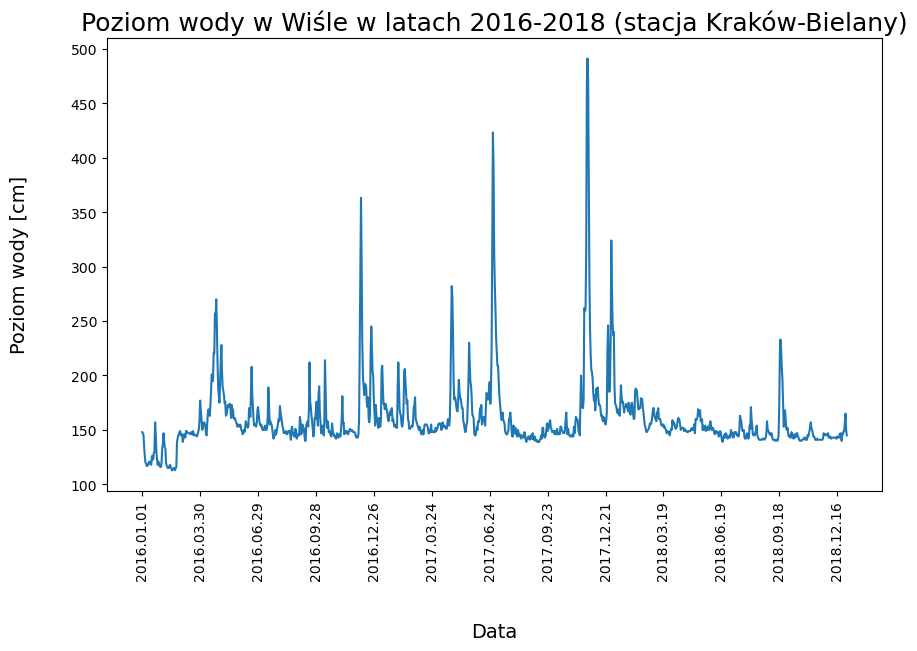

In [5]:
fig1 = plt.figure(figsize=(10, 6), dpi=100, facecolor='#ffffff')
plt.plot(
    KRK_BIELANY['Data'],
    KRK_BIELANY['Stan wody [cm]'],
)
plt.title('Poziom wody w Wiśle w latach 2016-2018 (stacja Kraków-Bielany)', fontdict={'fontsize': 18})
plt.ylabel('Poziom wody [cm]', fontdict={'fontsize': 14}, labelpad=30)
plt.xlabel('Data', fontdict={'fontsize': 14}, labelpad=30)
plt.xticks(KRK_BIELANY['Data'][::90], rotation=90)
plt.savefig('output/fig1.png', bbox_inches='tight')
plt.show()
plt.close(fig1)